### Auto-Generated Code Cells

The following code cells contain code from external .py files that has been automatically added to remove these dependencies. This allows you to run this version of the SELENE notebook on Cloud platforms such as Google Colab. Run all following code cells before starting with the actual notebook content. 

Most Cloud platforms such as Google Colab have a wide range of Python packages preinstalled. However, if any import statements in the following code cells throws an error because of a missing package, you can create and run a new code cell to install the missing package using the `pip` command as shown here:
```
!pip install <package-name>
```

You can use the code cell below for convenience.

In [ ]:
#!pip install <package-name>

In [ ]:
# === Inline content for module src.utils.libimports.logreg  ==

# === Inlined imports ===
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
from src.utils.plotting.logreg import *
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

# === Embedded configs ===


# === Inlined definitions ===


<img src="https://raw.githubusercontent.com/chrisvdweth/selene/refs/heads/master/notebooks/images/logo/selene-logo-640.png" style="max-height:75px;" alt="SELENE Logo" />

**Disclaimer:** This Jupyter Notebook contains content generated with the assistance of AI. While every effort has been made to review and validate the outputs, users should independently verify critical information before relying on it. The SELENE notebook repository is constantly evolving. We recommend downloading or pulling the latest version of this notebook from Github.

# Logistic Regression: The Math

Understanding the mathematics behind a logistic regression model is crucial because it provides insight into how the model makes predictions, how it optimizes its parameters, and how different variables influence the outcome. Without this mathematical foundation, one might use logistic regression as a black-box tool without fully grasping its strengths and limitations. By delving into concepts such as the sigmoid function, cost function, and gradient descent, you gain a more intuitive sense of how the model behaves with different datasets.

One key reason to learn the underlying math is to understand the sigmoid function, which transforms linear combinations of input features into probabilities. Unlike linear regression, which predicts continuous values, logistic regression uses this function to squash outputs between 0 and 1, making it suitable for classification problems. This transformation ensures that the model’s predictions can be interpreted as probabilities, which is fundamental in fields such as medical diagnosis and financial risk assessment. Additionally, knowing the cost function and optimization techniques helps in evaluating and improving the model. Logistic regression typically uses log-loss (or cross-entropy) as a cost function to measure how well the predicted probabilities match the actual labels. By applying gradient descent, the algorithm updates the model’s coefficients iteratively to minimize this loss. Understanding this process allows you to fine-tune parameters, detect convergence issues, and avoid pitfalls such as overfitting or underfitting.

By mastering the mathematics behind logistic regression, you not only gain confidence in applying the model but also develop critical problem-solving skills that apply to more advanced machine learning techniques.

### Setting up the Notebook

#### Make Required Imports

This notebook requires the import of different Python packages but also additional Python modules that are part of the repository. If a package is missing, use your preferred package manager (e.g., [conda](https://anaconda.org/anaconda/conda) or [pip](https://pypi.org/project/pip/)) to install it. If the code cell below runs with any errors, all required packages and modules have successfully been imported.

---

## Why the Sigmoid Function?

In the introductory notebook for Logistic Regression, we saw that we use the Sigmoid function $\sigma$ to squeeze the unbounded values of the linear signal &mdash; that is, the weighted sum of the input features and the weights &mdash; into the range between $0$ and $1$ so we can interpret the output $\hat{y}$ as a probability. This we expressed using the following expression:

$$\large
\hat{y}_i = \sigma \left(\mathbf{w}^T\mathbf{x}_i  \right) = \frac{1}{1 + e^{-\mathbf{w}^T\mathbf{x}_i}}
$$

However, beyond ensuring the lower and upper bound of the output $\hat{y}$, it is not obvious why we use $\sigma$. After all there are other ways to ensure $\hat{y} \in [0,1]$. For example, we could also use a simple step function that returns either $0$ or $1$ given the value of the linear signal:

$$\large
\hat{y}_i =
\begin{cases}
1, &  \mathbf{w}^T\mathbf{x}_i > 0\\[0.5em]
0, &  \text{otherwise}
\end{cases}
$$


So let's see how we can motivate the use of the Sigmoid function as our function of choice. Recall, that in the basic case of binary Logistic Regression that wie defined to the out of the model $y_{i}$ for a given data sample $\mathbf{x_i}$ to be the probability of $x_{i}$ to belong to class $Y=1$, that is, $y_{i} = P(Y=1|X=x_{i})$; in the following, we write $p(x_i)$ to refer to $P(Y=1|X=x_{i})$. Similar to the idea of Linear Regression, we want to express this probability $p(x_i)$ as some linear combination or linear signal of the features $\mathbf{x}_{i}$ and a set of weights (or coefficients) $\mathbf{w}$, expressed by the dot product $\mathbf{w}^T\mathbf{x}_i$. So let's be very naive and try:

$$\large\color{red}
p(x_i) = \mathbf{w}^T\mathbf{x}_i
$$

It is very clear that this cannot work. The left-hand side $p(x_i)$ must be between $0$ and $1$, while the linear signal $\mathbf{w}^T\mathbf{x}_i$ is unbounded, i.e., it can take on arbitrary small and large values. This means we need some kind of function that maps from the interval $[0, 1]$ to the interval $(-\infty, +\infty)$. Let's try using the logarithm function.

$$\large\color{red}
\log p(x_i) = \mathbf{w}^T\mathbf{x}_i
$$

To better see what is going on, we can plot $\log p(x_i)$:

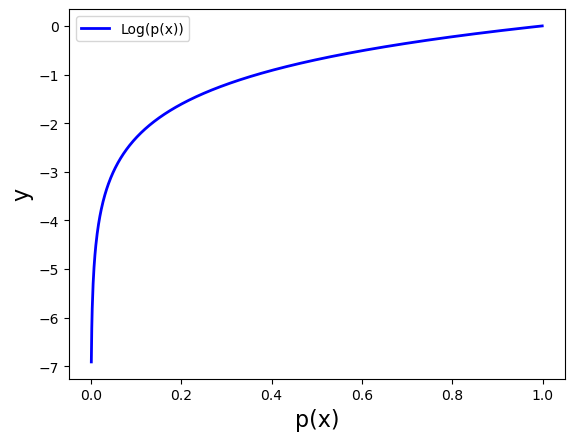

In [2]:
# Generate data
px = np.linspace(0.001, 0.999, 1000)
y = np.log(px)

# Plot function
plt.figure()
plt.plot(px, y, label='Log(p(x))', color='b', lw=2)
plt.xlabel('p(x)', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.legend()
plt.show()

With this we have achieved that probabilities $p(x_i)$ that go towards $0$ get map to a values towards $0$ &mdash; note that $\log{0}$ is not defined so the plot above uses $\log{0.001}$ is the smallest value of $p(x_i)$. However, for probability $p(x_i)$ to value is $0$. The problem is that logarithms are unbounded in only one direction, and linear functions are not. In other words, we need some function that mirrors the effect of the $\log$ function for probabilities close to $0$ also for probabilities close to $1$ (of course, with an opposite sign).

The easiest modification of $\log p(x_i)$ which has an unbounded range is the **logistic transformation** or **logit transformation** &mdash; hence the name Logistic Regression. 

$$\large
\log \left( \frac{p(x_i)}{1-p(x_i)}   \right) = \mathbf{w}^T\mathbf{x}_i
$$

Again, let's firs plot this logistic transformation as a graph:

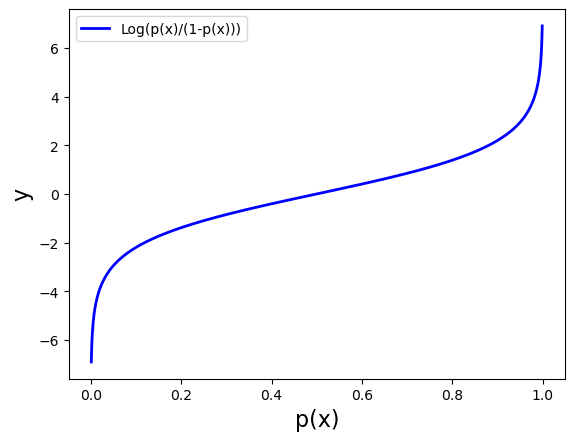

In [3]:
y = np.log(px / (1-px))
 
# Plot function
plt.figure()
plt.plot(px, y, label='Log(p(x)/(1-p(x)))', color='b', lw=2)
plt.xlabel('p(x)', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.legend()
plt.show()

Now both the left-hand side and the right-hand side are unbounded make our equation now meaningful. Of course, since $\hat{y}_i = p(x_i)$, we no need to solve the equation

$$\large
\log \left( \frac{p(x_i)}{1-p(x_i)}  \right) = \mathbf{w}^T\mathbf{x}_i
$$

for $p(x_i)$. As the first step, assuming $\log$ is the natural logarithm, we can use the exponential function $e$ to get rid of the logarithm on the left-hand side, giving us:

$$\large
\frac{p(x_i)}{1-p(x_i)} = e^{\mathbf{w}^T\mathbf{x}_i}
$$

No we can multiply both sides with $1-p(x_i)$ to bring $1-p(x_i)$ to the right-hand side and expanding the right-hand side by multiplying $e^{\mathbf{w}^T\mathbf{x}_i}$ with both terms in the parenthesis. The result will be as follows:

$$
\begin{align}
\large p(x_i) &= \large e^{\mathbf{w}^T\mathbf{x}_i}[1-p(x_i)]\\[0.5em]
&= \large e^{\mathbf{w}^T\mathbf{x}_i} - p(x_i)e^{\mathbf{w}^T\mathbf{x}_i}
\end{align}
$$

To have all terms contains $p(x_i)$ on the same side, we can bring $p(x_i)e^{\mathbf{w}^T\mathbf{x}_i}$ over to the left-hand side simply by adding this term to both sides:

$$\large
p(x_i) + p(x_i)e^{\mathbf{w}^T\mathbf{x}_i} = e^{\mathbf{w}^T\mathbf{x}_i}
$$

This means we can now factor out $p(x_i)$ on the left-hand side

$$\large
p(x_i) [1 + e^{\mathbf{w}^T\mathbf{x}_i}] = e^{\mathbf{w}^T\mathbf{x}_i}
$$

Thus, as a last step, we can divide both sides by $1 + e^{\mathbf{w}^T\mathbf{x}_i}$ to get an equation with $p(x_i)$ being on one side on its own:

$$\large
p(x_i) = \frac{e^{\mathbf{w}^T\mathbf{x}_i}}{1 + e^{\mathbf{w}^T\mathbf{x}_i}}
$$

While we could stop here, we can further transform our equation to simplify it, by performing the transformation steps shown below.

$$
\begin{align}
\large p(x_i) &= \large \frac{e^{\mathbf{w}^T\mathbf{x}_i}}{1 + e^{\mathbf{w}^T\mathbf{x}_i}}\\[0.5em]
&= \large \frac{1}{  \frac{1 + e^{\mathbf{w}^T\mathbf{x}_i}}{e^{\mathbf{w}^T\mathbf{x}_i}}  }\\[0.5em]
&= \large \frac{1}{ \frac{1}{e^{\mathbf{w}^T\mathbf{x}_i}} + \frac{e^{\mathbf{w}^T\mathbf{x}_i}}{e^{\mathbf{w}^T\mathbf{x}_i}} }\\[0.5em]
&= \large \frac{1}{1 + e^{-\mathbf{w}^T\mathbf{x}_i}}
\end{align}
$$

After those simplification steps, we finally get our equation using the Sigmoid function:

$$\large
\hat{y}_i = \large p(x_i) = \frac{1}{1 + e^{-\mathbf{w}^T\mathbf{x}_i}}
$$

The Sigmoid function, compared to the step function, has another advantage. Unlike the step function &mdash; which jumps from 0 to 1 abruptly &mdash; the sigmoid function is continuous and differentiable, but still relatively simple. This smoothness allows iterative optimization methods such as gradient descent to efficiently update weights during optimization.

---

## Deriving the Cross-Entropy Loss

For training a supervised classification model, we need to define a suitable loss function that allows us to quantify and assess how well a model performs given a current set of values weights $\mathbf{b}$. In the introductory notebook, well already introduced the Cross-Entropy Loss as a suitable loss function for basic Logistic Regression. However, we did not show how to derive this loss function based on the model definition of Logistic Regression. So let's do this now in more detail. Again, we start out with the definition of the output of a Logistic Regression model

$$\large
\hat{y}_i = \sigma \left(\mathbf{w}^T\mathbf{x}_i  \right) = \frac{1}{1 + e^{-\mathbf{w}^T\mathbf{x}_i}}
$$

where the application of the Sigmoid function $\sigma(z)$ to the weights sum $\mathbf{w}^T\mathbf{x}_i$ ensures that all values for $\hat{y}_i$ get squished into the range $(0, 1)$. This in turn allows us to interpret all $\hat{y}_i$ as a probability. By common convention, we define $\hat{y}_i$ as the probability of the value $y=1$ for a given data point $\mathbf{x}_i$ and set of weights $\mathbf{w}$:

$$\large
\hat{y}_i = P(y_i=1|\mathbf{x}_i,\mathbf{w})
$$

Recall that we consider only binary classification and therefore only have two discrete outcomes $y=1$ and $y=0$. Since the probabilities of both outcomes must sum up to $1$, i.e., $P(y=1|\mathbf{x}_i,\mathbf{w}) + P(y=0|\mathbf{x}_i,\mathbf{w}) = 1$, we can also write:

$$\large
\hat{y}_i = 1 - P(y_i=0|\mathbf{x}_i,\mathbf{w})
$$

Rewriting both formulas so that we have the probabilities on the same site, we get:

$$
\begin{align}
\large P(y_i=1|\mathbf{x}_i,\mathbf{w}) &= \large \hat{y}_i \\[1.25em]
\large P(y_i=0|\mathbf{x}_i,\mathbf{w}) &= \large 1 - \hat{y}_i
\end{align}
$$

or written as one equation using two cases:

$$\large
P(y_i|\mathbf{x}_i,\mathbf{w}) =
\begin{cases}
\hat{y}_i & y_i=1\\[0.75em]
1 - \hat{y}_i & y_i=0
\end{cases}
$$

With the foresight of having to calculate the derivative of the resulting loss function, we prefer an equation that does not require the explicit use of different cases. Here, since the conditions for both cases &mdash; $y=1$ or $y=0$ &mdash; are very simple, we can easily achieve this by rewriting our equation as:

$$\large
P(y_i|\mathbf{x}_i,\mathbf{w}) = \hat{y}_i^{y_i}(1-\hat{y_i})^{1-y_i}
$$

You can convince yourself that this formula capture both cases by evaluating the formula for both $y_i=1$ and $y_i=0$, which gives us $P(y_i=1|\mathbf{x}_i,\mathbf{w}) = \hat{y}_i^{1}(1-\hat{y_i})^{1-1} = \hat{y}_i$ and $P(y_i=0|\mathbf{x}_i,\mathbf{w}) = \hat{y}_i^{0}(1-\hat{y_i})^{1-0} = 1-\hat{y}_i$ as the expected outputs.

Intuitively, we now want to find the values for the weights $\mathbf{w}$ that maximize the probability $P(y_i|\mathbf{x}_i,\mathbf{w})$. This will require the calculation of its derivative, which we will cover later. With this goal in mind, we can first simply this formula to avoid having $y_i$ in the exponent. For this, we can apply the logarithm to both sites and utilizing the two logarithm rules $\log{ab}=\log{a}+\log{b}$ as well as $\log{a^b} = b\log{a}$:

$$
\begin{align}
\large \log{ P(y_i=1|\mathbf{x}_i,\mathbf{w})} &= \large \log{\left[ \hat{y}_i^{y_i}(1-\hat{y_i})^{1-y_i} \right]} \\[1.25em]
&= \large y_i \log{\hat{y}_i} + (1-y_i)\log{(1-\hat{y}_i)}
\end{align}
$$

Note that we still want to maximize this formula. Therefore, the last tweak we make to this formula is to add a negative sign as, by convention, a loss function is defined such that we want to find its minimum. This gives as the final definition of the **Cross-Entropy Loss** $L_{CE}$:

$$\large
L_{CE}(\hat{\mathbf{y}}, \mathbf{y}) = - \left[ y_i \log{\hat{y}_i} + (1-y_i)\log{(1-\hat{y}_i)} \right]
$$

With the definition of the Cross-Entropy loss, we now have a way to quantify how well a current choice of weights $\textbf{w}$ performs &mdash; that is, how well the predicted class labels using those weights $\mathbf{w}$ matches the true class labels given by the training data.

---

## Calculating the Derivative of the Cross Entropy Loss

To train a Logistic Regression Model using Gradient Descent or similar methods, we naturally need to calculate the gradients. This in turn requires first calculating the derivative of the Cross-Entropy Loss $L_{CE}$. In the introductory notebook, we just mentioned what the first derivative of the Cross-Entropy Loss function for Logistic Regression is. Now, in this notebook we actually want to see where the derivative is coming from.

**Side note:** Logistic Regression is typically solved using optimization techniques like [Newton's Method](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (or its variant, [Iteratively Reweighted Least Squares, IRLS](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares)) instead of Gradient Descent because Newton's Method converges much faster. While Gradient Descent updates parameters iteratively with a fixed learning rate, Newton’s Method uses the Hessian (second derivative) to adjust step sizes dynamically, leading to quadratic convergence. This makes Newton’s Method particularly efficient for convex functions like the log-likelihood in Logistic Regression. Additionally, Logistic Regression has a well-defined convex loss function (log-likelihood), making Newton's Method feasible since the Hessian matrix remains positive definite. Gradient Descent, on the other hand, may require careful tuning of the learning rate and could converge slowly, especially in high-dimensional spaces. However, in large datasets where computing the Hessian is expensive, Stochastic Gradient Descent (SGD) or other approximations are sometimes preferred.

Still, those methods also rely on the calculation of the first derivative &mdash; in fact, those advanced methods also use the second derivative. Calculating the first derivative of the Cross-Entropy Loss $L_{CE}$ is a rather straightforward process. However, it turns out that we can make our lives easier if we first calculate the first derivative of the Sigmoid function $\sigma(z)$ and use this result for calculating the derivative of $L_{CE}$.

### Calculating the Derivative of $\sigma(z)$

While the output of the Logistic Regression model is calculated as

$$\large
\hat{y} = \sigma(\theta^Tx)
$$

let's first focus on the Sigmoid function an treat the weighted sum $\theta^Tx$ as some input $z$:

$$\large
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

We can therefore treat $\sigma(z)$ as a univariable function and find the derivative $\frac{d(\sigma(z))}{dz}$ by applying both the [quotient rule](https://en.wikipedia.org/wiki/Quotient_rule) and the [chain rule](https://en.wikipedia.org/wiki/Chain_rule):

$$\large
\frac{d\sigma}{dz} = \frac{0 \cdot (1+ e^{-z}) - (1)\cdot (e^{-z} \cdot (-1))}{(1+ e^{-z})^2}
$$

This immediately simplifies to

$$\large
\frac{d \sigma}{dz} = \frac{(e^{-z})}{(1+ e^{-z})^2}
$$

Now we can apply some mathematical trickery to further transform this equation. While it first looks like we are making the equation more complicated, you will see the usefulness at the end. Let's just add and subtract 1 from the numerator

$$\large
\frac{d\sigma}{dz} = \frac{1 + (e^{-z}) - 1}{(1+ e^{-z})^2}
$$

With this we can split the quotient into

$$\large
\frac{d\sigma}{dz} = \frac{1 + (e^{-z})}{(1+ e^{-z})^2} - \frac{1}{(1+ e^{-z})^2}  = \frac{1}{(1+ e^{-z})} - \frac{1}{(1+ e^{-z})^2}
$$

By factoring out $\frac{1}{1+ e^{-z}}$ we get

$$\large
\frac{d\sigma}{dz} = \frac{1}{1+ e^{-z}} \left(1 - \frac{1}{1 + e^{-z}} \right)
$$

which in turn is the same as

$$\large
\frac{d\sigma}{dz} = \sigma(z)(1-\sigma(z))
$$

This makes the Sigmoid function so convenient in practice, since we can calculate the gradient at a position $z$ by simply calculating $\sigma(z)$ and combining the result according to the formula above.

### Calculating partial derivatives $\frac{\partial L}{\partial w_i}$

With $\hat{y} = \sigma(\mathbf{w}^Tx)$, we can write our loss function L as follows:

$$\large
L = \frac{1}{n} \sum_{i=1}^n \left[ y_i \log{\sigma(\mathbf{w}^T\mathbf{x}_i)} + (1 - y_i) \log{(1- \sigma(\mathbf{w}^T\mathbf{x}_i)}) \right]
$$

With this we can directly calculate $\frac{\partial L}{\partial w_i}$. For this, let's consider two basic pieces of information. This first considers the derivative of logarithms. Given a function $f(x)$, if assume another function $g(x)$ that takes the logarithm of $f(x)$, i.e., $g(x) = \log{[f(x)]}$, the derivative of $g(x)$ with respect to $x$ is:

$$\large
\frac{d g}{dx} = \frac{d (\log{f})}{dx} = \frac{1}{f(x)}\frac{d f}{dx}
$$.

A second thing to consider is that the partial derivative of $\mathbf{w}^T\mathbf{x}_i$ with respect to a single weight $w_j$ is simply

$$\large
\frac{d(\mathbf{w}^Tx_i)}{d w_j} = x_{ij}
$$

where $x_{ij}$ the $j$-th feature value of data sample $\mathbf{x}_i$. This is easy to see when we write the vector product $\mathbf{w}^Tx_i$ as the sum of the vector elements

$$\large
\mathbf{w}^T\mathbf{x}_i = w_0x_{0i} + w_0x_{0i} + w_1x_{1i} + w_0x_{2i} + \dots + w_dx_{di}
$$

The derivative of the whole sum with respect to a single weight $w_{j}$ yields only the corresponding feature values $x_{ij}$. Applying these two intermediate results &mdash; together with the derivative of the sigmoid function $\sigma(z)$ we have calculated above &mdash; now allows us to calculate the derivative of loss $L$:


$$\large
\frac{\partial L}{\partial w_j} = \frac{1}{n} \sum_{i=1}^n \left[ \frac{y}{\sigma(\mathbf{w}^T\mathbf{x}_i)} \sigma(\mathbf{w}^T\mathbf{x}_i)(1-\sigma(\mathbf{w}^T\mathbf{x}_i))x_{ij} + \frac{1-y}{1-\sigma(\mathbf{w}^T\mathbf{x}_i)}(-1)\sigma(\mathbf{w}^T\mathbf{x}_i)(1-\sigma(\mathbf{w}^T\mathbf{x}_i))x_{ij} \right]
$$

Let's simplify this. First notice that both terms of the inner sum have the same factor $\sigma(\mathbf{w}^Tx)(1-\sigma(\mathbf{w}^Tx))x_{ij}$ which we can factor out, yielding

$$\large
\frac{\partial L}{\partial w_j} = \frac{1}{n} \sum_{i=1}^n \left[ \frac{y}{\sigma(\mathbf{w}^Tx_i)} - \frac{1-y}{1-\sigma(\mathbf{w}^Tx_i)} \right] \sigma(\mathbf{w}^T\mathbf{x}_i)(1-\sigma(\mathbf{w}^T\mathbf{x}_i))x_{ij}
$$

Note how the $(-1)$ flipped the sign between the two inner terms. If we bring the two terms in the brackets to the same denominator, we get:

$$
\begin{align}
\large \frac{\partial L}{\partial w_i} &= \large \frac{1}{n} \sum_{i=1}^n \left[ \frac{y - y\sigma(\mathbf{w}^T\mathbf{x}_i) - (\sigma(\mathbf{w}^T\mathbf{x}_i) - y\sigma(\mathbf{w}^T\mathbf{x}_i)}{\sigma(\mathbf{w}^T\mathbf{x}_i)(1-\sigma(\mathbf{w}^T\mathbf{x}_i))} \right] \sigma(\mathbf{w}^T\mathbf{x}_i)(1-\sigma(\mathbf{w}^T\mathbf{x}_i))x_{ij} \\[1.25em]
&= \large \frac{1}{n} \sum_{i=1}^n \left[ \frac{y - \sigma(\mathbf{w}^T\mathbf{x}_i)}{\sigma(\mathbf{w}^T\mathbf{x}_i)(1-\sigma(\mathbf{w}^T\mathbf{x}_i))}  \right] \sigma(\mathbf{w}^T\mathbf{x}_i)(1-\sigma(\mathbf{w}^T\mathbf{x}_i))x_{ij}  \\[1.25em]
\end{align}
$$

We can see that we can now cancel quite a lot of terms, giving us:

$$\large
\frac{\partial L}{\partial w_j} = \frac{1}{n} \sum_{i=1}^n ( y - \sigma(\mathbf{w}^T\mathbf{x}_i) ) x_{ij}
$$

And with this, we are basically done. The last step is again to convert is partial derivative for one $w_j$ to the partial derivative for vector $\mathbf{w}$, which gives us the the final derivative:

$$\large
\frac{\partial L}{\partial \mathbf{w}} = \frac{1}{n} \mathbf{X}^T (\sigma(\mathbf{w}^T\mathbf{X}) - \mathbf{y})
$$

where $\sigma(\mathbf{w}^T\mathbf{X})$ is simply our $h_\mathbf{w}(\mathbf{X})$:

$$\large
\frac{\partial L}{\partial \mathbf{w}} = \frac{1}{n} \mathbf{X}^T (h_\mathbf{w}(\mathbf{X}) - \mathbf{y})
$$

---

## Summary

Understanding why we use Cross-Entropy Loss for Logistic Regression is crucial for grasping both its theoretical foundation and practical implementation. Logistic Regression is used for binary classification, where the goal is to estimate the probability that a given input belongs to a particular class. The Cross-Entropy Loss (also known as Log Loss) is derived from the likelihood function in probability theory, ensuring that our model maximizes the probability of correctly classifying training examples. It measures the difference between the predicted probabilities and the actual class labels, penalizing incorrect predictions more heavily than small errors, leading to better-calibrated probabilities.

The Cross-Entropy Loss function for a single training example is given by:

$$\large
L(y, \hat{y}) = - \left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]
$$

where $y$ is the true label (0 or 1), and $\hat{y}$ is the predicted probability from the logistic function $\hat{y} = \sigma(\theta^Tx)$. This loss function naturally arises when using Maximum Likelihood Estimation (MLE) to fit the Logistic Regression model, making it a statistically sound choice. It ensures that small probability errors are properly weighted, preventing extreme confidence in incorrect predictions.

To optimize the Logistic Regression model, we need to compute the gradient (derivative) of the Cross-Entropy Loss with respect to the model parameters/weights $\mathbf{w}$ . The gradient is given by:

$$
\begin{align}
\large \frac{\partial L}{\partial \mathbf{w}} &= \large \frac{1}{n} \mathbf{X}^T (\sigma(\mathbf{w}^T\mathbf{X}) - \mathbf{y})\\[0.5em]
&= \large \frac{1}{n} \mathbf{X}^T (h_\mathbf{w}(\mathbf{X}) - \mathbf{y})
\\[0.5em]
&= \large \frac{1}{n} \mathbf{X}^T (\mathbf{\hat{y}} - \mathbf{y})
\end{align}
$$

where $\mathbf{X}$ is the input feature matrix, $\mathbf{\hat{y}}$ is the vector of predicted probabilities, and $\mathbf{y}$ is the vector of true labels. This derivative is used in optimization algorithms like Gradient Descent or Newton’s Method (via IRLS) to update model parameters and minimize the loss $L_{CE}$. Understanding this derivative is essential for implementing and improving Logistic Regression models, as it enables efficient learning and better generalization to unseen data.